In [1]:
#import packages
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
#read data from data ingestor script
df = pd.read_csv('transactions.csv')

df.head()

,Unnamed: 0,country,customer_id,invoice,year,month,day,stream_id,times_viewed,price
0,0,United Kingdom,15581.0,493463,2018,1,1,20895,1,2.95
1,1,United Kingdom,15581.0,493463,2018,1,1,20866,1,1.25
2,2,United Kingdom,15581.0,493463,2018,1,1,85198,12,0.85
3,3,United Kingdom,15581.0,493463,2018,1,1,20897,1,2.95
4,4,United Kingdom,15581.0,493463,2018,1,1,20898,1,2.95


In [ ]:
'''
PRE PROCESSING
look at initial data types DONE
fix any data types DONE? (streamid - might need to go back to data ingestion script and remove letters)
clean up Unnamed column DONE
transform dmy columns into 1 DONE
index on country DONE
index on date DONE
index on year-month DONE
save as new df/csv DONE

sum up total revenue for each country DONE
sort, identify top 10 DONE
cut out data for top 10 countries DONE
save as new df/csv

DATA VIZZES
total revenue for each country DONE
descriptive stats
distributions of each variable
visualise price over time

counts per country of:
- unique customer ids?
- invoices?
- unique stream ids?

'''

In [4]:
#initial dtypes
df.dtypes

Unnamed: 0        int64
country          object
customer_id     float64
invoice          object
year              int64
month             int64
day               int64
stream_id        object
times_viewed      int64
price           float64
dtype: object

In [5]:
#make country and stream id categorical
'''
#invoice as well???
'''

df[['country','stream_id']] = df[['country', 'stream_id']].astype('category')

In [6]:
df.dtypes

Unnamed: 0         int64
country         category
customer_id      float64
invoice           object
year               int64
month              int64
day                int64
stream_id       category
times_viewed       int64
price            float64
dtype: object

In [7]:
#drop 'unnamed' column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
#create date column
#day, month and years to be concatenated into one value to be stored in this column
df['date'] = np.NaN
df['date'] = df['year'].astype(str) + df['month'].astype(str).str.zfill(2) + df['day'].astype(str).str.zfill(2)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [10]:
#create year-month column
#to allow aggregation of price per month
df['year-month'] = np.NaN
df['year-month'] = df['year'].astype(str) + df['month'].astype(str).str.zfill(2)
df['year-month'] = pd.to_datetime(df['year-month'], format='%Y%m').dt.strftime('%Y-%m')

In [11]:
#group by date, year, month, aggregation = sum
dfdate = df.groupby(by=['date','country']).sum()
dfyear = df.groupby(by=['year']).sum()
dfmonth = df.groupby(by=['year-month','country']).sum()

In [ ]:
#save csv file with index as the date
dfdate.to_csv('transactions_date_index.csv')

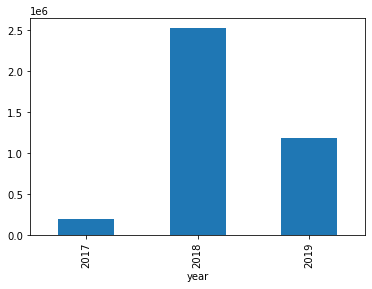

In [13]:
#visualise revenue per year
dfyear['price'].plot(kind='bar')

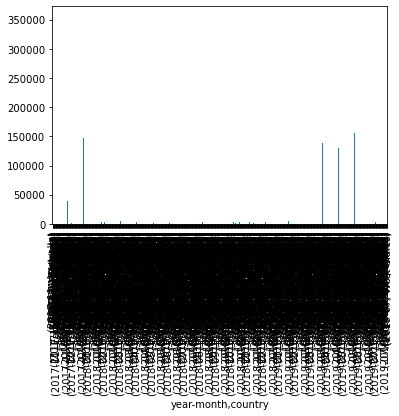

In [12]:
#visualise revenue per month
dfmonth['price'].plot(kind='bar')

In [14]:
#group by country and find top 10 highest revenue countries
dfcountry = df.groupby(by='country').sum()
dfcountry['price'] = dfcountry['price'].round(2)

#top 10 countries with the highest revenue:
top10 = dfcountry.sort_values(by='price', ascending=False)[:10]

In [15]:
#list full revenue totals
top10['price']

country
United Kingdom    3521513.51
EIRE               107069.21
Germany             49271.82
France              40565.14
Norway              38494.75
Spain               16040.99
Hong Kong           14452.57
Portugal            13528.67
Singapore           13175.92
Netherlands         12322.80
Name: price, dtype: float64

In [287]:
#save top 10 countries into a list
top10revenuecountries = top10.index.to_list()
top10revenuecountries

['United Kingdom',
 'EIRE',
 'Germany',
 'France',
 'Norway',
 'Spain',
 'Hong Kong',
 'Portugal',
 'Singapore',
 'Netherlands']

Text(0, 0.5, 'Total revenue')

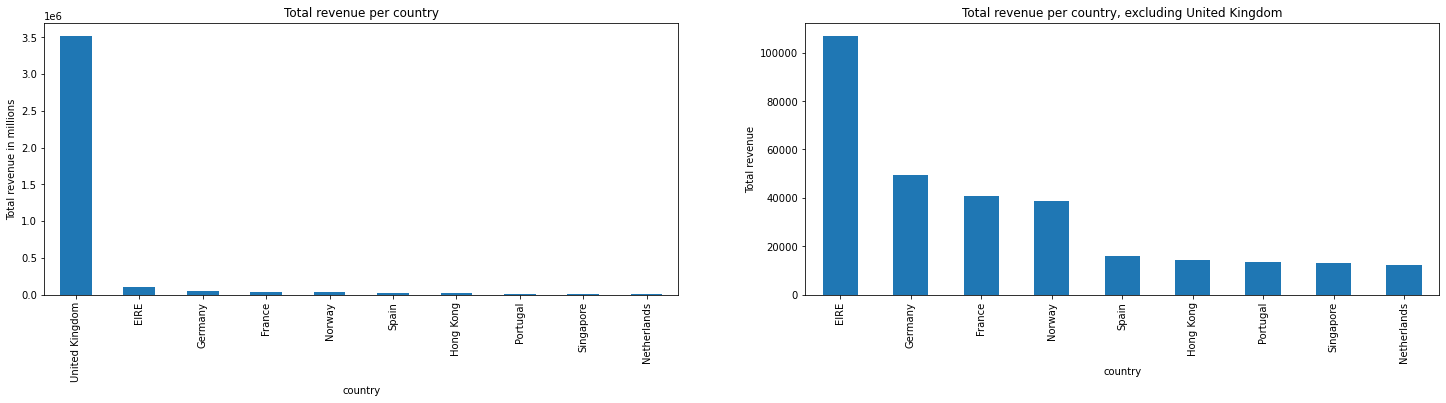

In [17]:
#plot revenue by country
fig, axs = plt.subplots(1,2, figsize=(25,5))

top10['price'].plot(kind='bar', ax=axs[0])
axs[0].set_title('Total revenue per country')
axs[0].yaxis.set_label_text('Total revenue in millions')

#excluding the UK
top10['price'][1:10].plot(kind='bar', ax=axs[1])
axs[1].set_title('Total revenue per country, excluding United Kingdom')
axs[1].yaxis.set_label_text('Total revenue')

In [237]:
#get indexes for non top 10 countries and remove rows to leave data for top 10 countries only
indexnames = df[~df['country'].isin(top10revenuecountries)].index
dftop10 = df.drop(indexnames)
dftop10['country'].value_counts()

United Kingdom          751228
EIRE                     13577
Germany                  13336
France                    9899
Netherlands               4024
Spain                     2606
Portugal                  1815
Norway                     796
Singapore                  310
Hong Kong                  276
Finland                      0
European Community           0
Denmark                      0
Czech Republic               0
West Indies                  0
Cyprus                       0
Channel Islands              0
Canada                       0
Brazil                       0
Bermuda                      0
Belgium                      0
Bahrain                      0
Austria                      0
Greece                       0
Japan                        0
Iceland                      0
Israel                       0
United Arab Emirates         0
USA                          0
Thailand                     0
Switzerland                  0
Sweden                       0
Saudi Ar

In [242]:
#groupby on country and month
dfidxd = dftop10.groupby(by=['country', 'year-month'])['price'].sum()
#filter out top 10 countries, move country back from index as a column
dfidxd = dfidxd.loc[top10revenuecountries].unstack('country')
#view table to plot as time series
dfidxd

country,EIRE,France,Germany,Hong Kong,Netherlands,Norway,Portugal,Singapore,Spain,United Kingdom
year-month,,,,,,,,,,
2017-11,570.21,352.42,156.480,NaN,49.33,NaN,208.75,NaN,3.35,39445.590
2017-12,3862.88,847.92,1369.310,NaN,334.93,123.28,85.60,NaN,841.87,147795.480
2018-01,14825.74,1564.87,2121.430,NaN,378.95,NaN,214.42,NaN,3567.65,156741.514
2018-02,2523.79,1694.52,1570.700,NaN,1199.31,NaN,289.91,NaN,90.49,103386.264
2018-03,4686.84,911.74,2427.520,NaN,877.41,33628.55,171.94,NaN,254.86,211490.981
2018-04,3042.55,705.27,2352.251,100.26,734.49,NaN,11.78,152.76,178.88,103206.131
2018-05,3761.58,1475.30,1469.110,4793.22,850.73,NaN,186.17,NaN,504.89,136435.360
2018-06,3044.98,1214.97,2937.690,54.60,402.68,NaN,621.63,NaN,79.61,217849.500
2018-07,4133.82,4783.86,4130.510,NaN,499.18,NaN,96.85,NaN,252.44,91460.410


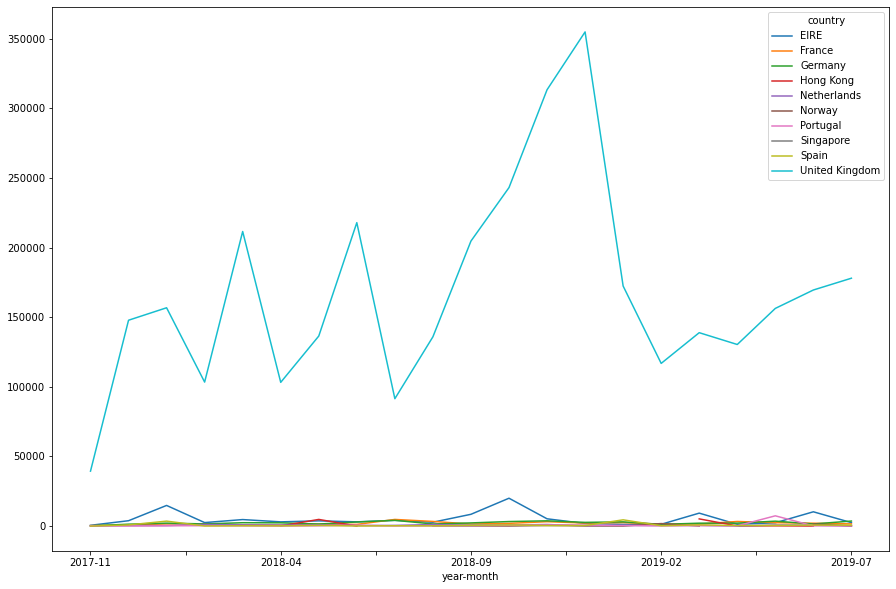

In [245]:
#plot time series of total revenue per month for top 10 countries for all data
dfidxd.plot(figsize=(15,10))

In [288]:
#create new list without uk for visualisation
top10revenuecountries_no_uk = top10revenuecountries.copy()
top10revenuecountries_no_uk.remove('United Kingdom')

['EIRE', 'Germany', 'France', 'Norway', 'Spain', 'Hong Kong', 'Portugal', 'Singapore', 'Netherlands']
['United Kingdom', 'EIRE', 'Germany', 'France', 'Norway', 'Spain', 'Hong Kong', 'Portugal', 'Singapore', 'Netherlands']


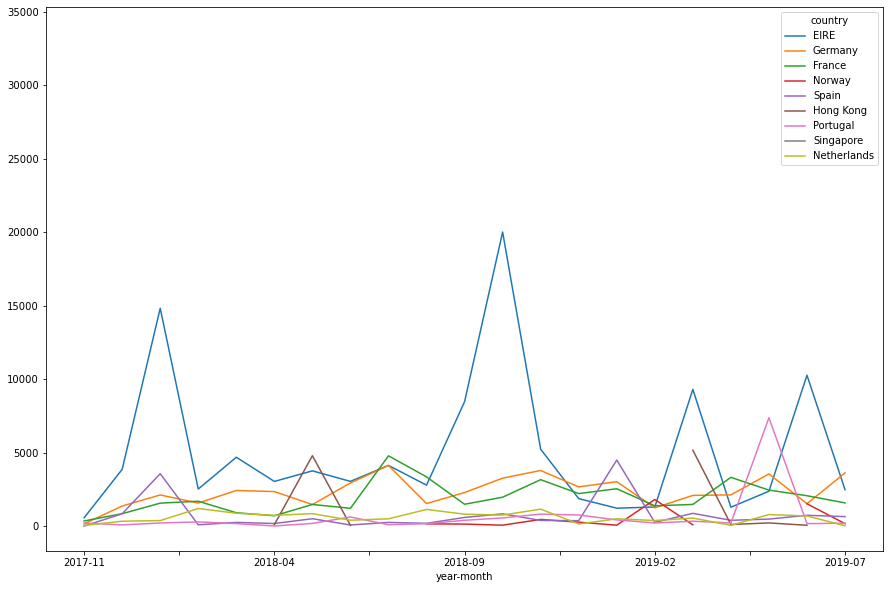

In [293]:
#plot revenue over time without the UK to see other 9 countries
dfidxd[top10revenuecountries_no_uk].plot(figsize=(15,10))